In [26]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so

sns.set_theme()

In [25]:
df = pd.read_csv("so-75182899.csv", index_col=0)
df

,Id,week1,week2,week3,classes,LessAvg,DeptAvg
0,1000,69.0,59.0,73.0,COA111,67,67
1,1001,71.0,47.0,65.0,COA111,61,67
2,1002,76.0,59.0,64.0,COA111,66,67
3,1003,56.0,69.0,50.0,COA113,58,64
4,1006,60.0,56.0,71.0,COA113,62,64
...,...,...,...,...,...,...,...
101,1117,53.0,44.0,56.0,COA113,51,64
102,1118,69.0,62.0,69.0,COA111,67,67
103,1118,59.0,75.0,56.0,COA113,63,64
104,1119,62.0,53.0,67.0,COA111,61,67


In [95]:
df_long = (
    pd.melt(df,
        id_vars=["Id", "classes", "LessAvg", "DeptAvg"],
        var_name=["week"],
        value_name="point"
    )
    .assign(week=lambda df_: df_.week.str.replace("week", ""))
)
df_long

,Id,classes,LessAvg,DeptAvg,week,point
0,1000,COA111,67,67,1,69.0
1,1001,COA111,61,67,1,71.0
2,1002,COA111,66,67,1,76.0
3,1003,COA113,58,64,1,56.0
4,1006,COA113,62,64,1,60.0
...,...,...,...,...,...,...
313,1117,COA113,51,64,3,56.0
314,1118,COA111,67,67,3,69.0
315,1118,COA113,63,64,3,56.0
316,1119,COA111,61,67,3,67.0


In [79]:
df_long.drop_duplicates(["classes", "week"])

,Id,classes,LessAvg,DeptAvg,week,point
0,1000,COA111,67,67,1,69.0
3,1003,COA113,58,64,1,56.0
106,1000,COA111,67,67,2,59.0
109,1003,COA113,58,64,2,69.0
212,1000,COA111,67,67,3,73.0
215,1003,COA113,58,64,3,50.0


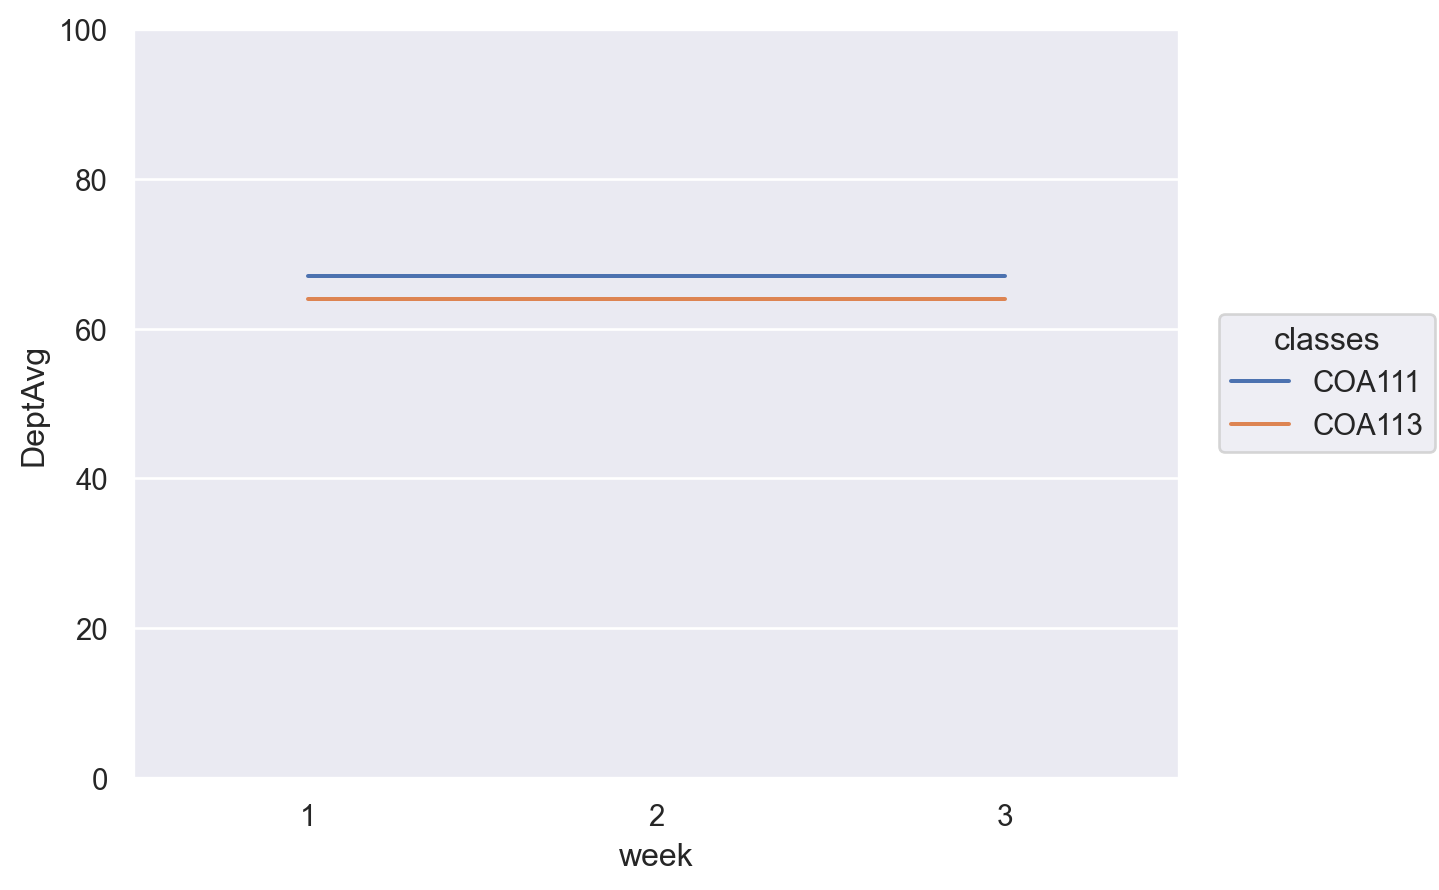

In [81]:
(
    so.Plot(
        df_long.drop_duplicates(["classes", "week"]),
        x="week", y="DeptAvg", color="classes"
    )
    .add(so.Line())
    .limit(y=(0, 100))
)

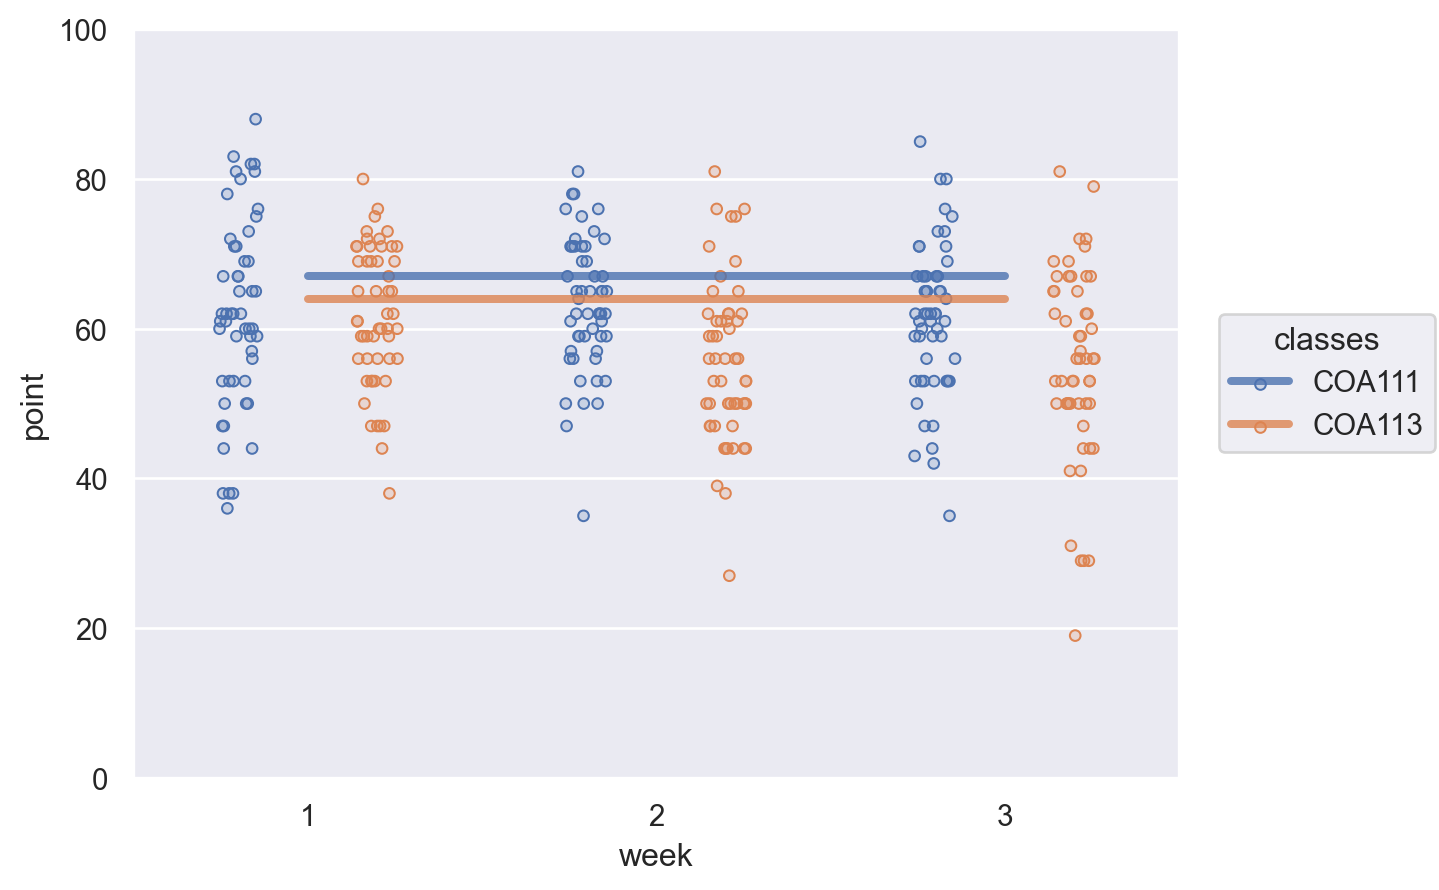

In [93]:
(
    so.Plot(data=df_long, x="week", y="point", color="classes")
    .add(so.Dots(), so.Dodge(), so.Jitter(.3))
    .add(so.Line(linewidth=3, alpha=.8), y="DeptAvg")
    .limit(y=(0, 100))
)

In [15]:
df_tmp = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

df_tmp

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [22]:
pd.melt(df_tmp, id_vars=["A"])


,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6
